# Finding Philosophy

From [Wikipedia](https://en.wikipedia.org/wiki/Wikipedia:Getting_to_Philosophy):

> Clicking on the first link in the main text of a Wikipedia article, and then repeating the process for subsequent articles, will usually lead to the Philosophy article.

----

Rules:
- Start on a random Wikipedia page
- Link must be within main body of article
- Link must be to another Wikipedia article (i.e. no external pages)
- Link must be valid (e.g. no 404 errors)
- Link must not be within parenthesis or italicized
- End search when reaching Philosophy or a dead end (loop, no links in article)
- Keep count of how many pages it takes for each search and whether they find Philosophy or not
-----

Running `find_philosophy.py` will start a search from 500 random wikipedia articles, printing out page titles as they are accessed as well as the final outcome of the searches. 

Once the 500 searches are done, data on distribution of path lengths is also displayed.

In [34]:
%run find_philosophy.py

--- Starting on:  BC Valga  ---
Basketball
Team sport
Sport
Competition
Territory (animal)
Ethology
Scientific method
Scientific technique
Systematic process
Critical thinking
Fact
Experience
Knowledge
Awareness
Quality (philosophy)
Philosophy found in  16  steps.
--- Starting on:  Archive of Serbia  ---
National archives
Archive
Historical document
Document
Thought
Idea
Philosophy found in  7  steps.
--- Starting on:  Prvý Slíž  ---
Slovakia
Geographic coordinate system
Coordinate system
Geometry
Mathematics
Quantity
Property (philosophy)
Philosophy found in  8  steps.
--- Starting on:  Royal Wootton Bassett Town F.C.  ---
England
Country
Political geography
Politics
Governance
Government
State (polity)
Polity
Entity
Existence
Ontology
Philosophy found in  12  steps.
--- Starting on:  These Things  ---
Rock music
Popular music
Music industry
Musical composition
Music
Art
Human behavior
Motion (physics)
Physics
Natural science
Science
Knowledge
Page already visited, ending search.
Phil

On a given run, the results were as follows:

- 454/500 pages found Philosophy.
- Path lengths mean: 12
- Standard deviation: 3.9
- Maximum: 27
- Minimum: 4
- Top five path lengths:
    - 8 (77 count)
    - 13 (43 count)
    - 9 (42 count)
    - 10 (37 count)
    - 14 (35 count)

-----

__Note:__ Although results were mostly consistent with these numbers, there was a brief period on 04/25/2017
that gave wildly different distributions. Only 185/500 searches ended in Philosophy; the culprit was a change to the Awareness page, a commonly encountered page two steps from Philosophy. Instead of leading to Quality (Philosophy), it linked back to Natural Science, creating a loop. Although the page has resumed linking to Awareness, such edits to key wikipedia pages can result in much different results from the ones presented here if `find_philosophy.py` is run again.

In [86]:
# Loading saved data from sample run

starting_pages = pd.read_csv('save/starting_pages.csv', index_col=0)
all_pages = pd.read_csv('save/all_pages.csv', index_col=0)
dist_end_in_philo = pd.read_csv('save/dist_end_in_philo.csv', index_col=0, header=None)

#### What percentage of pages often lead to Philosophy?

On a run starting on 500 random pages on 04/26/2017, __90.8%__ (454/500) of pages lead to Philosophy. Other 500 searches gave similar results, with around 6-10% of pages never reaching Philosophy.

Looking at all pages visited, we see that 8.2% of pages don't end in Philosophy, either because they entered a loop (a page linking back to a page already visited in the same search), or because they ended on a page with no valid link.

In [87]:
len(all_pages[all_pages['count'] < 0]) / len(all_pages)

0.08165752589884218

#### Distribution of path lengths

Looking at a graph of the distribution of the path lengths ending in Philosophy, we observe a multimodal distribution with the major mode at 8 and two minor modes at 13 and 16-17 . While the mean and median of path lengths is 12, 12 is actually an antimode (lowest point between modes 9 and 13). The distribution is positively skewed, climbing quickly to the highest mode after the minimum 4 pages, with a long tail ending at 27.

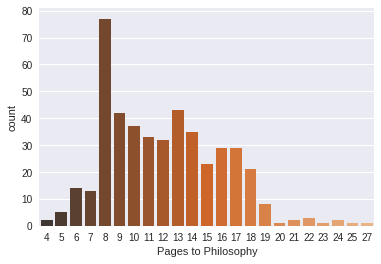

In [97]:
import seaborn as sns
%matplotlib inline

distribution = dist_end_in_philo.iloc[:, 0].astype(int)
ax = sns.countplot(x=distribution, palette="Oranges_d");
ax.set(xlabel='Pages to Philosophy')

#### Reducing the number of HTTP requests

Since we would encounter the same pages over and over as we get closer to the Philosophy page, creating a cache of all pages encountered (and their distance to Philosophy) was sure to drastically reduce the number of http requests. We store a value of `-1` if the search is unsuccessful (ends in a loop or in a page with no valid link to follow).

---

#### Exploratory Analysis

In [79]:
# Overview of distribution of starting pages
# Including pages not ending in Philosophy

starting_pages.describe()

,count
count,500.000000
mean,10.810000
std,5.318503
min,-1.000000
25%,8.000000
50%,11.000000
75%,14.000000
max,27.000000


In [98]:
starting_pages.head()

,page,count
0,BC Valga,16.0
1,Archive of Serbia,7.0
2,Prvý Slíž,8.0
3,Royal Wootton Bassett Town F.C.,12.0
4,These Things,15.0


In [99]:
# Overview of distribution of starting pages
# Only includes pages that end in Philosophy

distribution.describe()

count    454.000000
mean      12.006608
std        3.944701
min        4.000000
25%        9.000000
50%       12.000000
75%       15.000000
max       27.000000
Name: 1, dtype: float64

In [82]:
# Overview of distribution of all pages encountered
# Includes all pages encountered in every search
# Includes pages not ending in Philosophy

all_pages.describe()

,count
count,1641.00000
mean,9.82206
std,5.38562
min,-9.00000
25%,7.00000
50%,10.00000
75%,13.00000
max,27.00000


In [83]:
# Overview of distribution of all pages encountered
# Includes all pages encountered in every search
# Only includes pages that end in Philosophy

all_pages[all_pages['count'] > 0].describe()

,count
count,1507.000000
mean,10.929662
std,4.036565
min,1.000000
25%,8.000000
50%,10.000000
75%,13.000000
max,27.000000


In [102]:
all_pages.head()

,page,count
0,BC Valga,16.0
1,Basketball,15.0
2,Team sport,14.0
3,Sport,13.0
4,Competition,12.0


In [101]:
# Path lengths ordered by count

distribution.value_counts()

8     77
13    43
9     42
10    37
14    35
11    33
12    32
17    29
16    29
15    23
18    21
6     14
7     13
19     8
5      5
22     3
4      2
21     2
24     2
25     1
20     1
23     1
27     1
Name: 1, dtype: int64

In [103]:
distribution.mean()

12.006607929515418

In [104]:
distribution.median()

12.0

In [105]:
distribution.std()

3.9447005768047068